# Imports

In [97]:
#data import
import wget
import urllib

# regex
import re

#time
import pytz as tz
from datetime import datetime

#data explore
import numpy as np
np.random.seed(1337)

#support for reading excel files
import xlrd

# dataframes in python
import pandas as pd

import seaborn as sns

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

#defaults
plt.rcParams['figure.figsize'] = (20.0, 20.0)
plt.rcParams.update({'font.size': 10})
plt.rcParams['xtick.major.pad']='5'
plt.rcParams['ytick.major.pad']='5'

plt.style.use('ggplot')

# Data preparation

In [99]:

missing_values=["n/a","na","--"]
df = pd.read_csv("/Users/csrxr/Desktop/Data_Analytics/Course05/default of credit card clients.csv", na_values=missing_values)
df.head(10)



,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,20000,1,3,2,35,-2,-2,-2,-2,-1,...,0,13007,13912,0,0,0,13007,1122,0,0


In [100]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


   # Data Cleanup & Transfermation
   1.Convert column to lowercase
   2.Remove ID column
   3.Check for null and empty
   4.Dataset missing Pay_1 so converted Pay_0 to Pay_1

In [101]:
df.columns =[x.lower() for x in df.columns]
df = df.rename(index=str,columns={"pay_0": "pay_1"})
#df = df.drop('id', axis=1)
df.columns


Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object')

In [102]:
# Total missing values for each feature
df.isnull().sum()

limit_bal                     0
sex                           0
education                     0
marriage                      0
age                           0
pay_1                         0
pay_2                         0
pay_3                         0
pay_4                         0
pay_5                         0
pay_6                         0
bill_amt1                     0
bill_amt2                     0
bill_amt3                     0
bill_amt4                     0
bill_amt5                     0
bill_amt6                     0
pay_amt1                      0
pay_amt2                      0
pay_amt3                      0
pay_amt4                      0
pay_amt5                      0
pay_amt6                      0
default payment next month    0
dtype: int64

In [103]:

# total missing count
df.isnull().sum().sum()


0

In [104]:
print("Explanatory variables : {}".format(len(df.columns)-1))
print("Number of Observations : {}".format(df.shape[0]))

df['target'] = df['default payment next month']



Explanatory variables : 23
Number of Observations : 30000


In [105]:
df2 = df[:]

In [106]:
df['target'] = df['target'].astype('category')

# create target column
print("Target variable: '{}' -> '{}'".format('default payment next month', 'target'))

Target variable: 'default payment next month' -> 'target'


In [107]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 0 to 29999
Data columns (total 25 columns):
limit_bal                     30000 non-null int64
sex                           30000 non-null int64
education                     30000 non-null int64
marriage                      30000 non-null int64
age                           30000 non-null int64
pay_1                         30000 non-null int64
pay_2                         30000 non-null int64
pay_3                         30000 non-null int64
pay_4                         30000 non-null int64
pay_5                         30000 non-null int64
pay_6                         30000 non-null int64
bill_amt1                     30000 non-null int64
bill_amt2                     30000 non-null int64
bill_amt3                     30000 non-null int64
bill_amt4                     30000 non-null int64
bill_amt5                     30000 non-null int64
bill_amt6                     30000 non-null int64
pay_amt1                     

# Descriptive Analytics

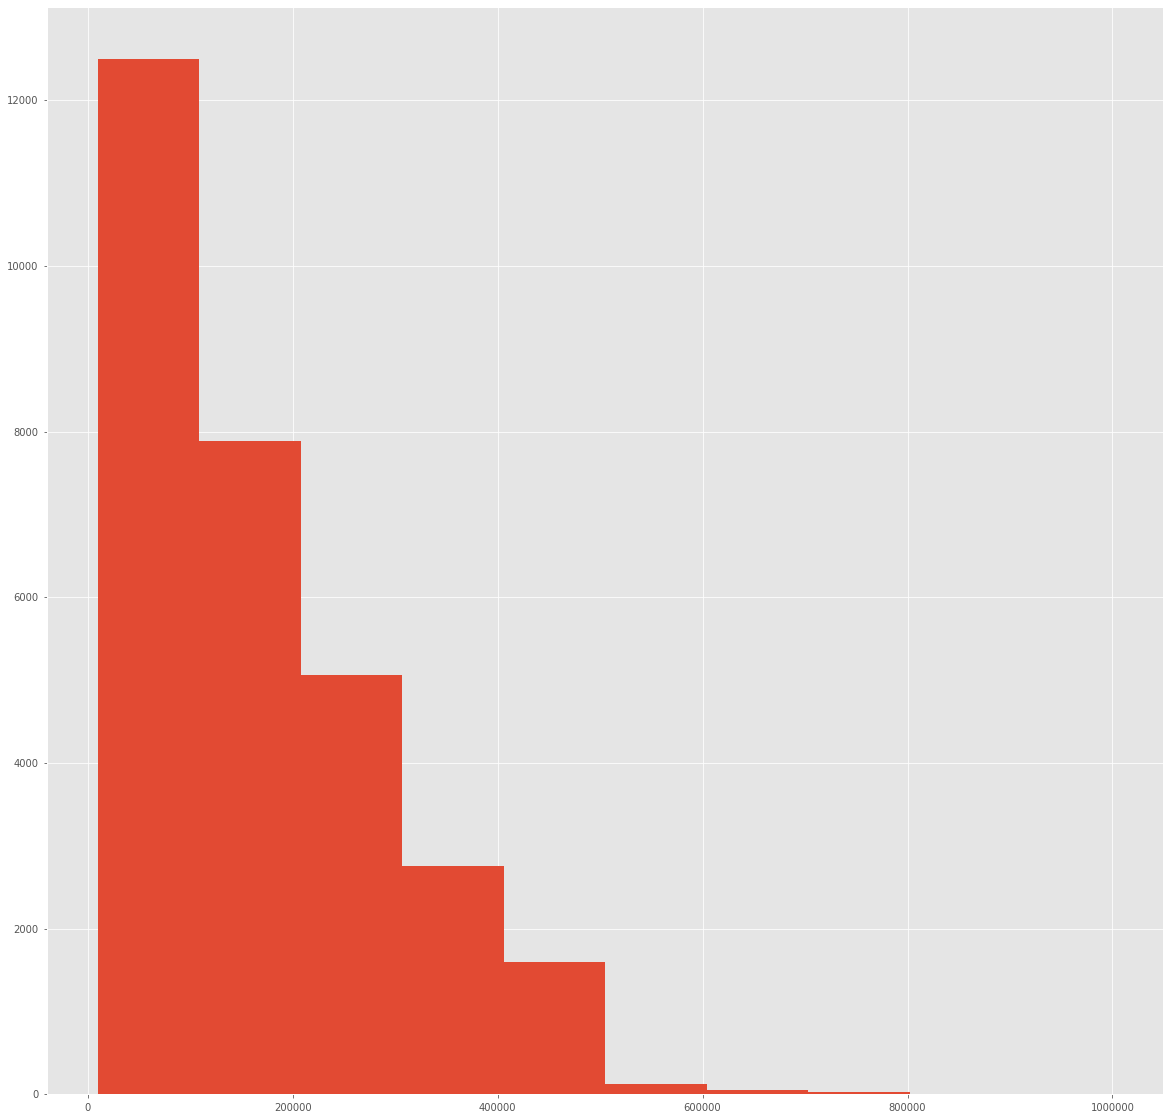

In [108]:
plt.hist(df['limit_bal'])
plt.show()

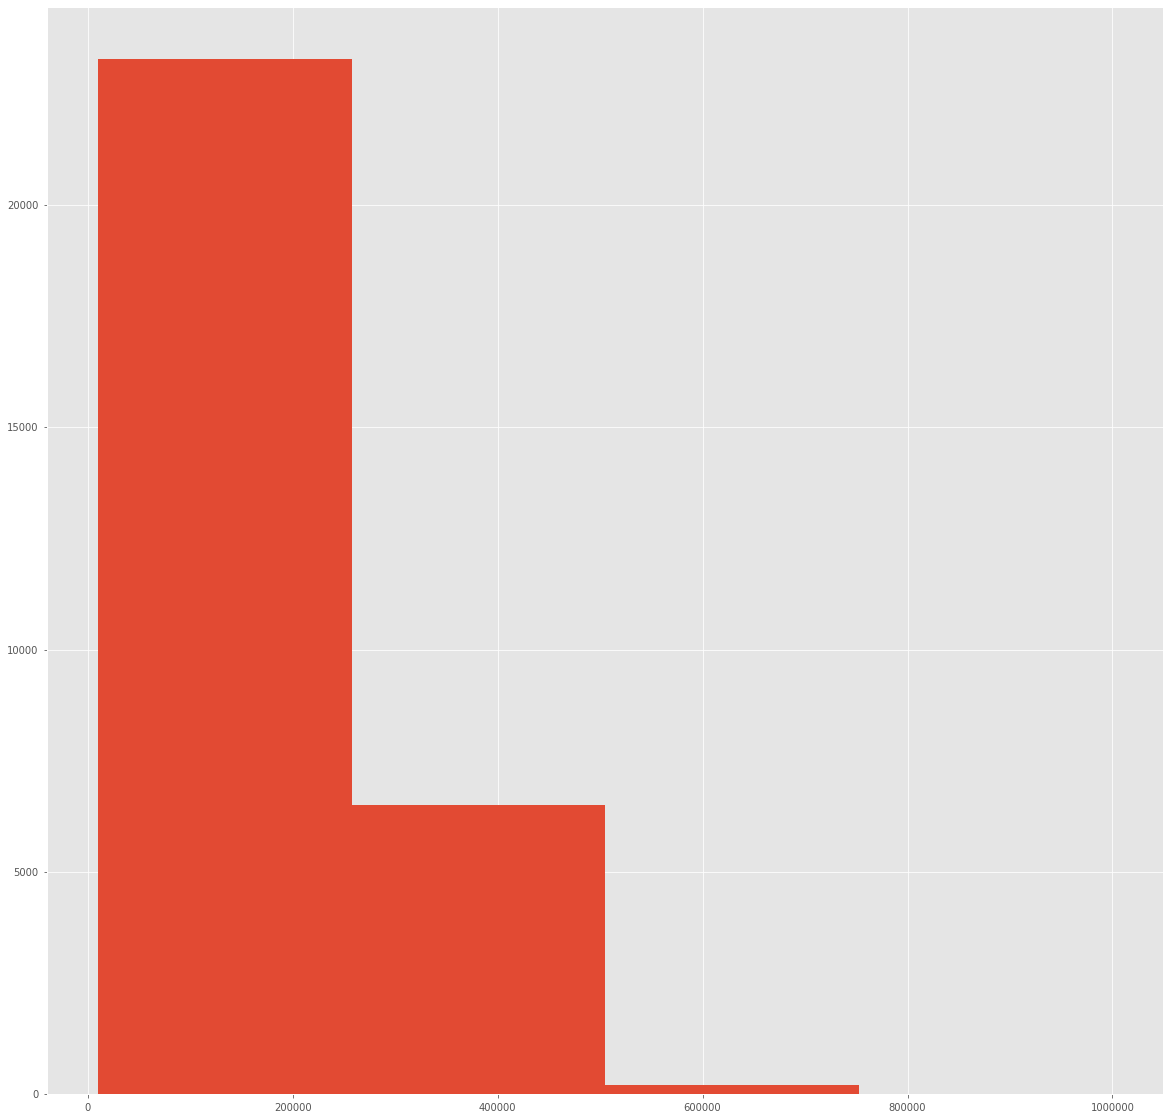

In [109]:
plt.hist(df['limit_bal'],bins=4)
plt.show()

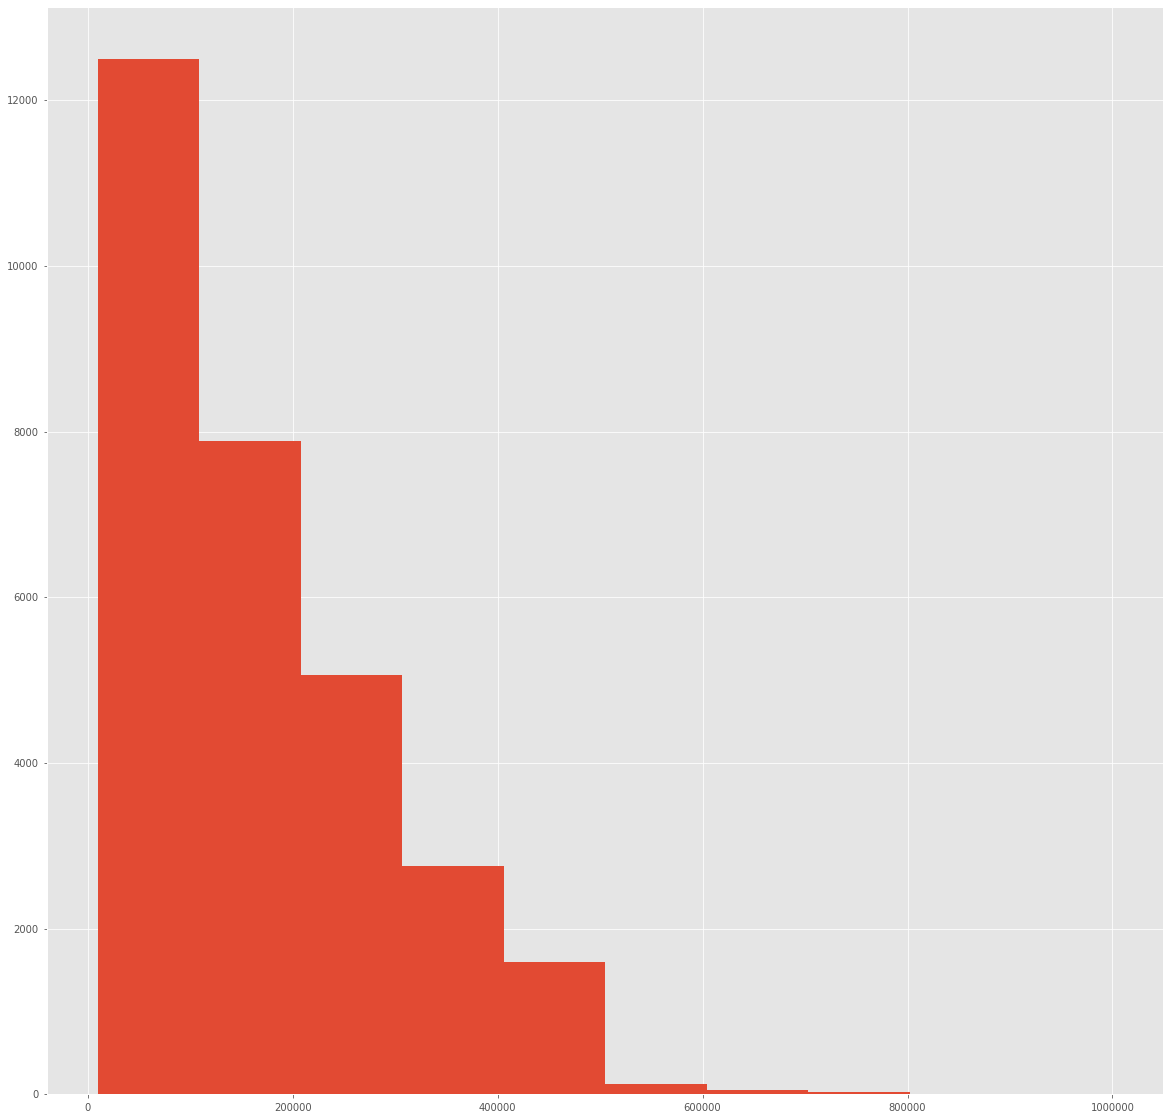

In [110]:
plt.hist(df['limit_bal'])
plt.show()

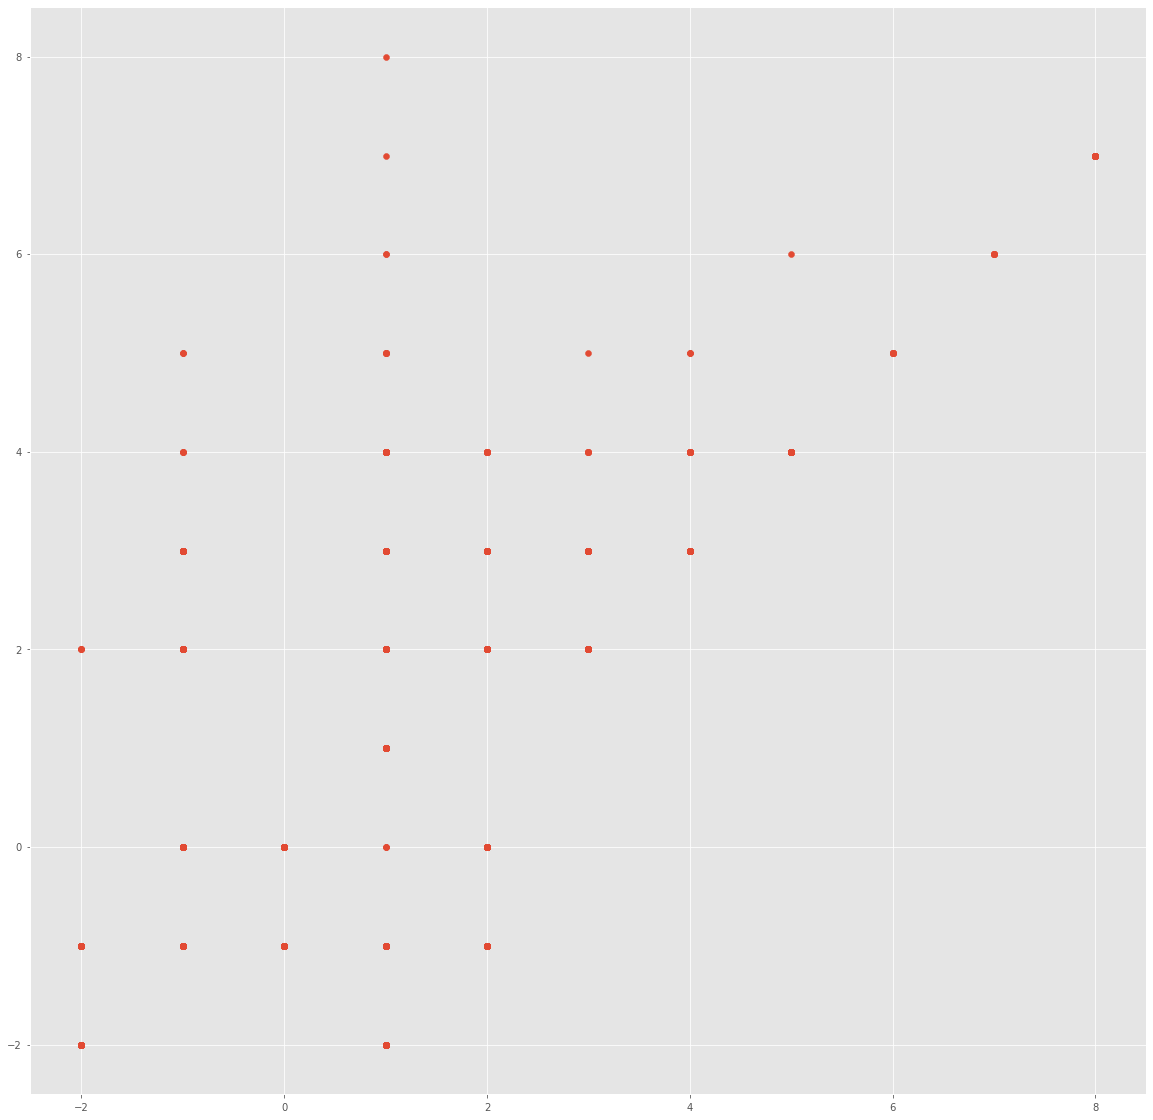

In [111]:
x = df['pay_1']
y = df['pay_2']
plt.scatter(x,y)
plt.show()

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month', 'target'],
      dtype='object')


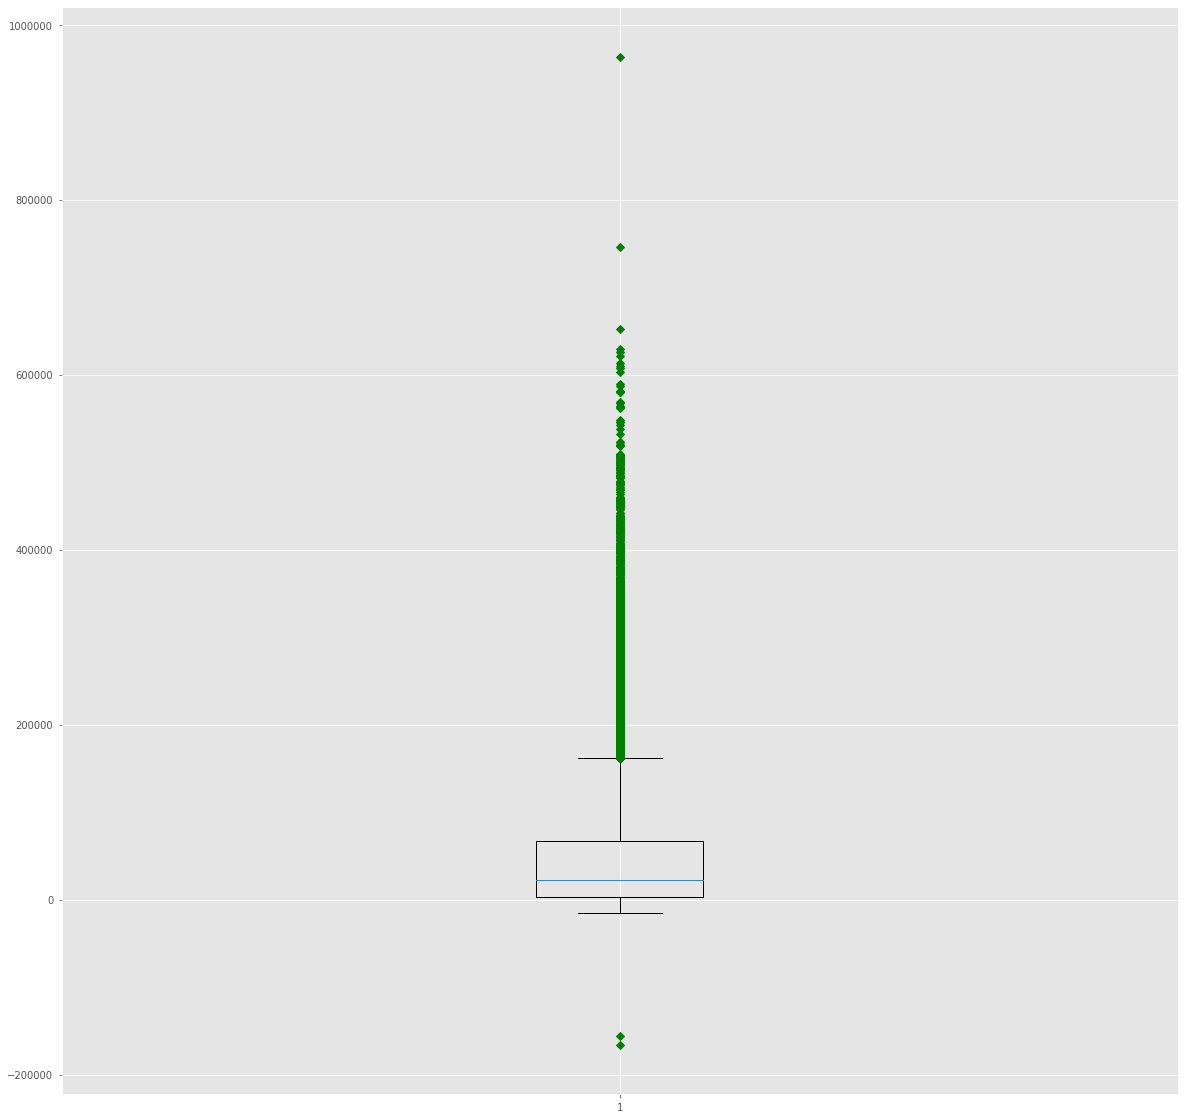

In [112]:
header = df.dtypes.index
print(header)
A = df['bill_amt1']
plt.boxplot(A,0,'gD')
plt.show()

/Users/csrxr/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


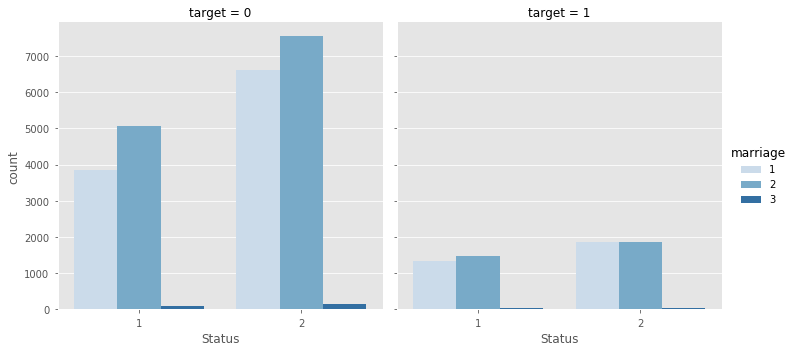

In [113]:
fg=sns.factorplot('sex', data=df, kind='count', hue='marriage', col='target', hue_order=range(1,4),
                 palette='Blues')
fg.set_xlabels('Status')

 # Payment Delays


In [114]:
pattern = re.compile("^pay_[0-9]+$")
pay_status_columns = [x for x in df.columns if(pattern.match(x))]
df[pay_status_columns].head(10)

,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6
0,2,2,-1,-1,-2,-2
1,-1,2,0,0,0,2
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,-1,0,-1,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,0,-1,-1,0,0,-1
8,0,0,2,0,0,0
9,-2,-2,-2,-2,-1,-1


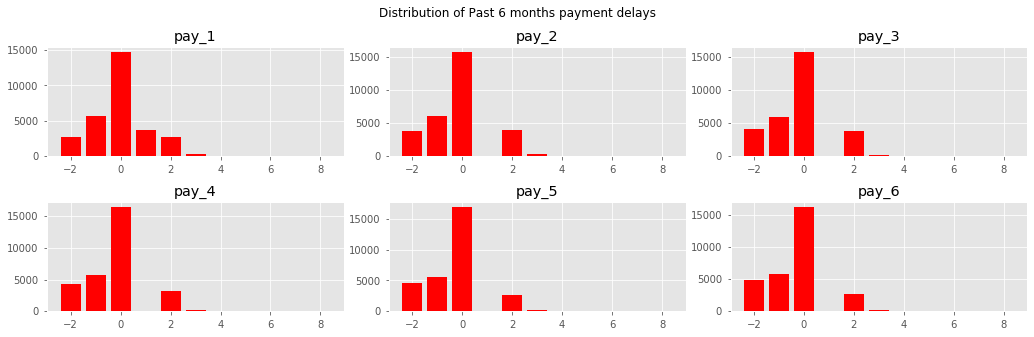

In [115]:
# pay status 
fig, ax = plt.subplots(2,3)
fig.set_size_inches(15,5)
fig.suptitle('Distribution of Past 6 months payment delays')

for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3
    
    d = df[pay_status_columns[i]].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='r')
    ax[row,col].set_title(pay_status_columns[i])
    
plt.tight_layout(pad=3.0, w_pad=0.5,h_pad=1.0)
plt.show()


## Observations:-
    1.Some customers are two months upfront and others one month upfront.
    2.Most of them are on par.
    3.A few customers running behind payments.

# Standing credit
check debts/credit is accumulatioin over the months.

In [116]:
# bill columns
pattern = re.compile("^bill_amt[0-9]+$")
bill_columns = [x for x in df.columns if(pattern.match(x))]
df[bill_columns].describe()

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [117]:
df[bill_columns].head(10)

,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
5,64400,57069,57608,19394,19619,20024
6,367965,412023,445007,542653,483003,473944
7,11876,380,601,221,-159,567
8,11285,14096,12108,12211,11793,3719
9,0,0,0,0,13007,13912


In [118]:
df['limit_bal'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: limit_bal, dtype: float64

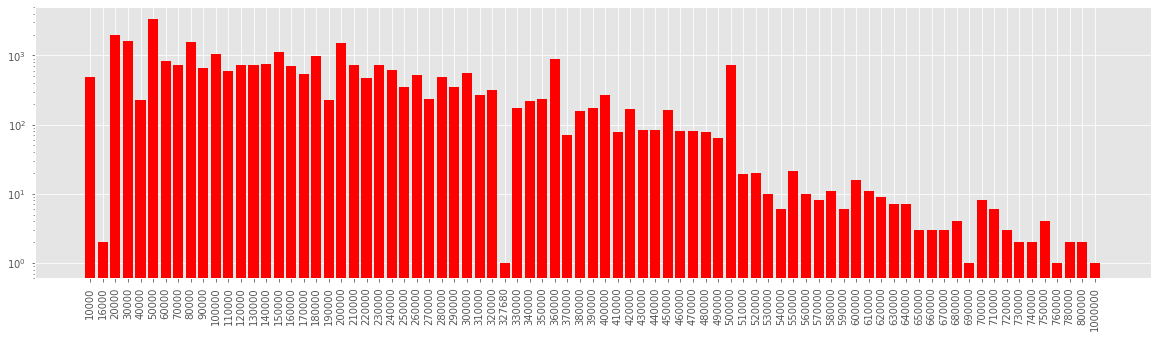

In [119]:
# limit balance
fig = plt.figure()
fig.set_size_inches(20,5)
ax = fig.add_subplot(111)

d = df.groupby(['limit_bal']).size()
ax.set_yscale("log")
ax.set_xticks(np.arange(len(d)))
ax.set_xticklabels(['%d' % i for i in d.index], rotation='vertical')
p = ax.bar(np.arange(len(d)), d, color='red')

defaulting accounts are 22.12% out of 30000 observarions
6636


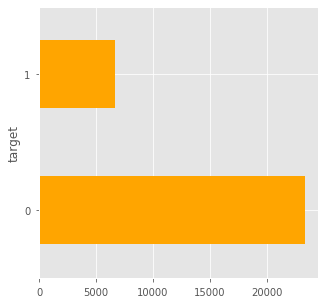

In [120]:
fig = plt.figure()
fig.set_size_inches(5,5)
d = df.groupby(['target']).size()


print("defaulting accounts are {}% out of {} observarions".format(100* d[1]/(d[1]+d[0]),d[1]+d[0]))
p = d.plot(kind='barh', color = 'orange')
print(d[1])

Text(0.5, 1.0, "Distribution of Passengers' Ages")

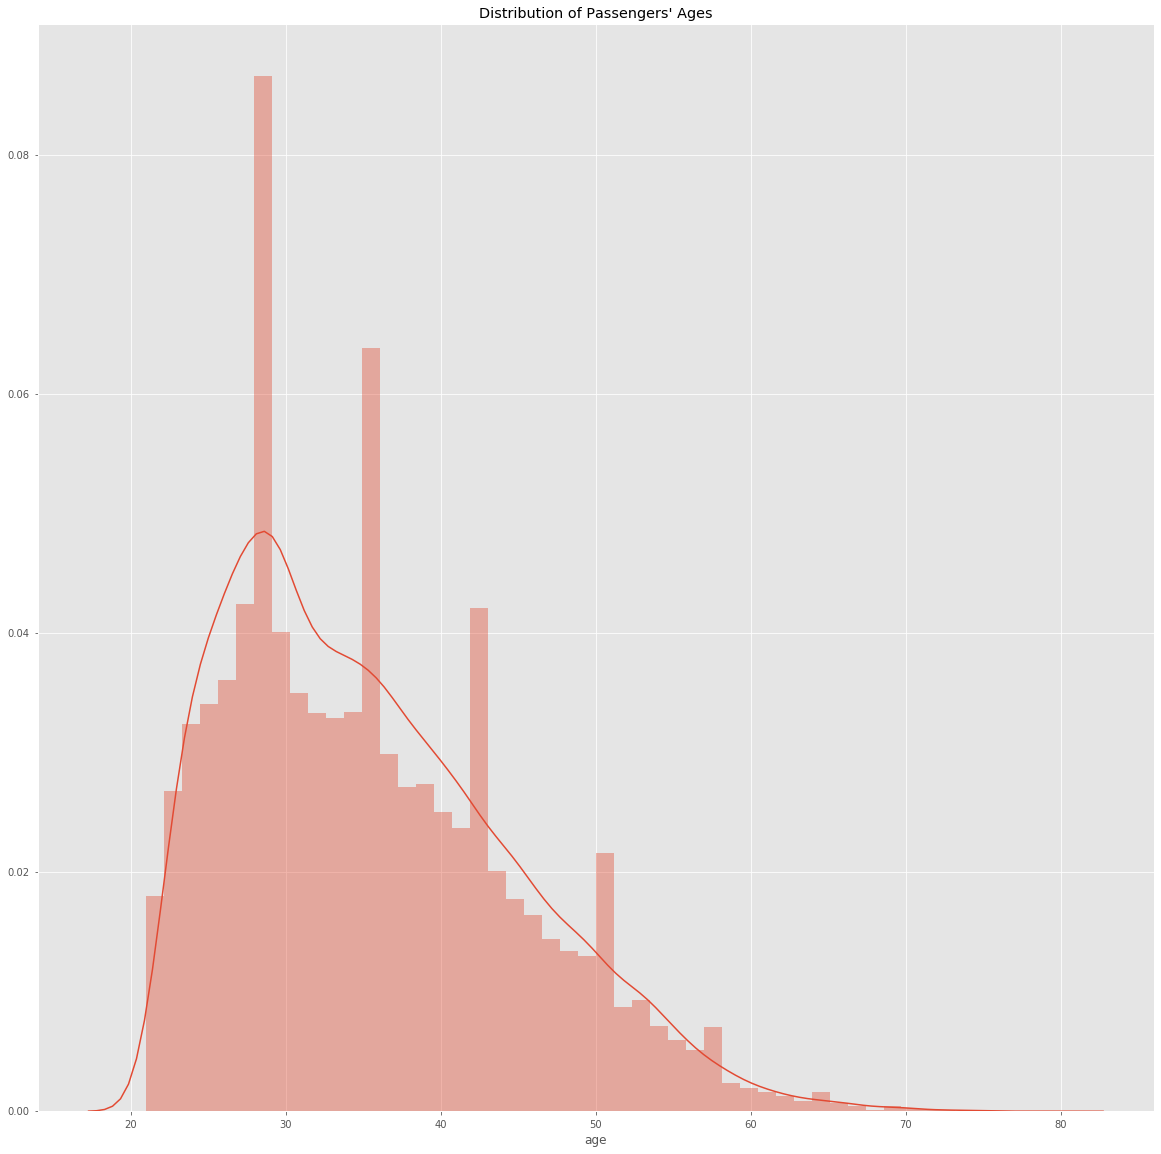

In [124]:
age = df['age'].dropna()

# Distribution of age, with an overlay of a density plot
age_dist = sns.distplot(age)
age_dist.set_title("Distribution of Passengers' Ages")

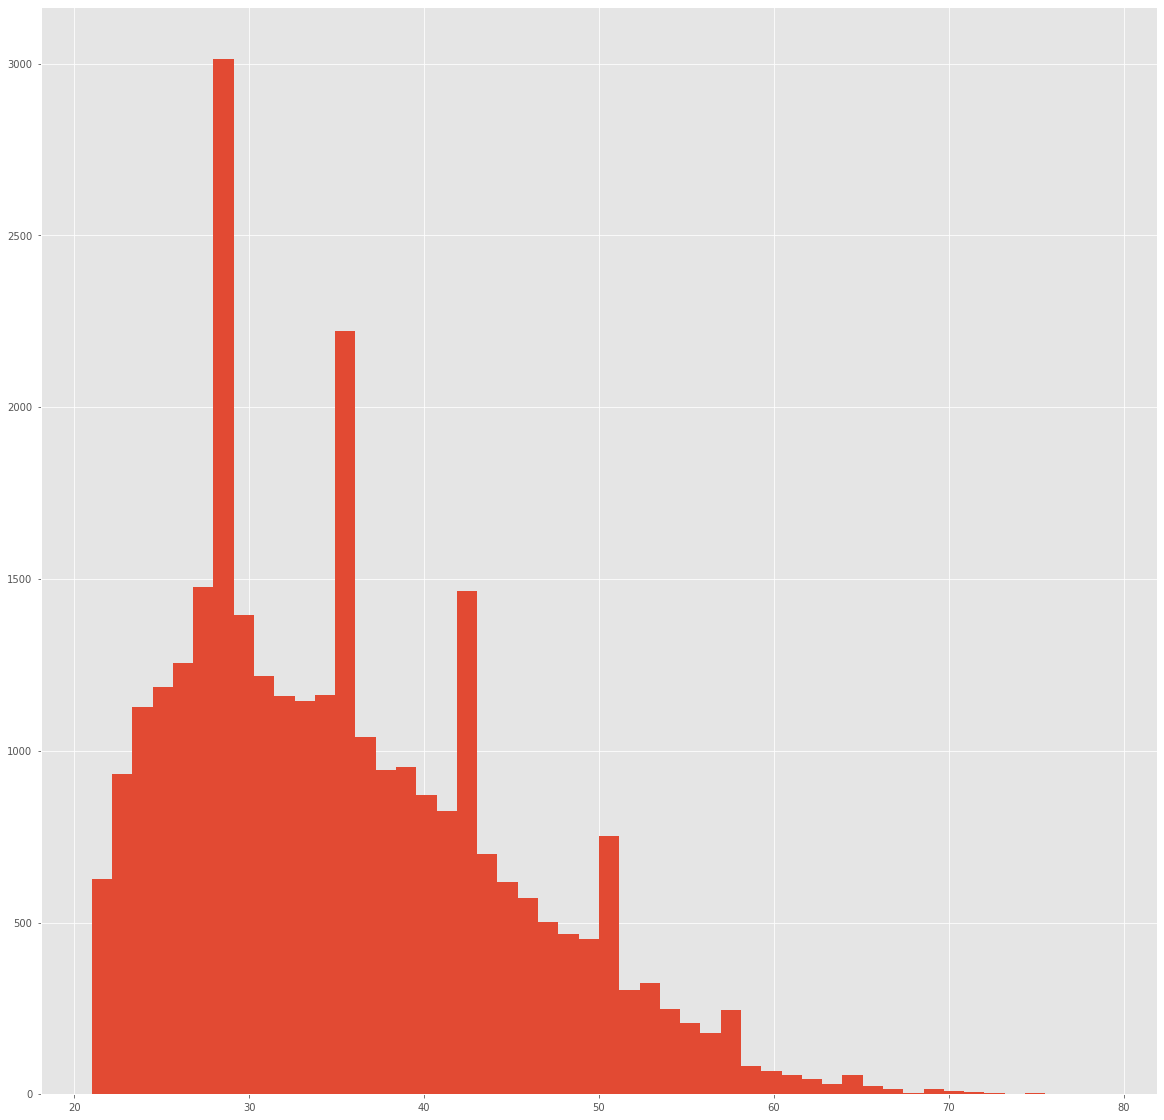

In [125]:
df['age'].hist(bins=50)

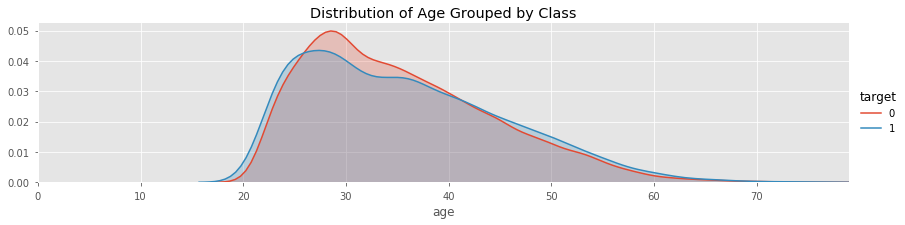

In [126]:
fig = sns.FacetGrid(df, hue='target', aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = df['age'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Class')
fig.add_legend()

In [127]:
df.groupby('sex')['sex'].count()

sex
1    11888
2    18112
Name: sex, dtype: int64

/Users/csrxr/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


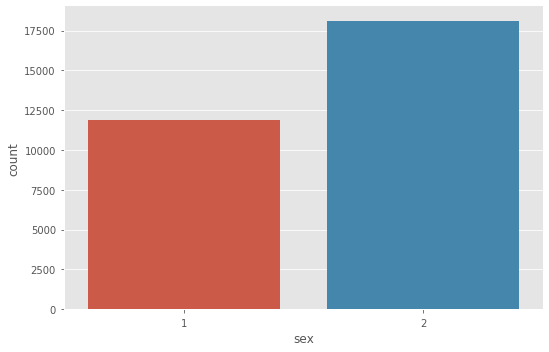

In [139]:
sns.factorplot('sex', data=df, kind='count', aspect=1.5)

In [140]:
#histograms to see how defaulting correlated with the categorical variables available
#convert target, sex, marriage, education, age and the pay_* columns to categories
df['sex_des'] = df['sex'].astype('category')
df['marriage_des'] = df['marriage'].astype('category')

df['sex_des'] = df['sex'].astype('category').cat.rename_categories(['M', 'F'])

df['marriage_des'] = df['marriage'].astype('category').cat.rename_categories(['na', 'married', 'single', 'other'])

#n_samples = 10
#a = np.random.randint(0, 10, n_samples)

# say you want to split at 1 and 3#
#boundaries = [1, 3]
# add min and max values of your data
#boundaries = sorted({df['age'].min(), df['age'].max() + 1} | set(boundaries))
#https://stackoverflow.com/questions/23267767/how-to-do-discretization-of-continuous-attributes-in-sklearn
#df['age_cat1'] = pd.cut(df['age'], bins=boundaries, labels=range(len(boundaries) - 1), right=False)
#df['age_cat2'] = pd.cut(df['age'], bins=boundaries, labels=range(len(boundaries) - 1), right=False).astype(float)
#df['age_cat3'] = pd.cut(df['age'], bins=boundaries, labels=range(0, 100, 10), right=False).astype(float)
#df['age_cat'] = pd.cut(df['age'], range(0, 100, 10), right=False).astype(np.int64)

#df['age_cat'] = pd.cut(df['age'], range(0, 100, 10), right=False)

#df['age_cat'] = pd.cut(df['age'], bins =4)

#df['age_val'] = pd.cut(df['age'], bins =4).value_counts()

#https://pbpython.com/pandas-qcut-cut.html

#Quantile-based discretization function.

df['age_cat'] = pd.qcut(df['age'], q=6, precision=0)

df['age_val'] = pd.qcut(df['age'],
                            q=6,
                            labels=False,
                            precision=0)
df.head()

from sklearn.preprocessing import Binarizer
# Create binarizer
#binarizer = Binarizer(18)

# Transform feature
#binarizer.fit_transform(df['age'])

#np.digitize(df['age'], bins=[10,20,100])

#bn = Binarizer(threshold=0.9)
#bn_age = bn.transform([df['age']])[0]




df['age_val'].head(11)

0     0
1     0
2     2
3     3
4     5
5     3
6     1
7     0
8     1
9     3
10    2
Name: age_val, dtype: int64

In [141]:
pattern = re.compile("^pay_[0-9]+$")
pay_status_columns = [ x for x in df.columns if (pattern.match(x))]
for i in pay_status_columns:
    df[i] = df[i].astype('category')

## Statistics : target/age/sex/marriage

/Users/csrxr/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


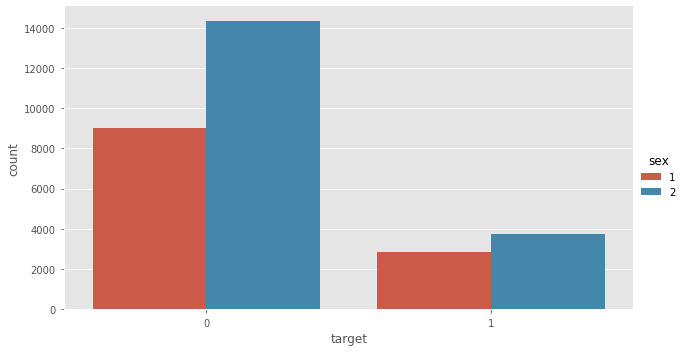

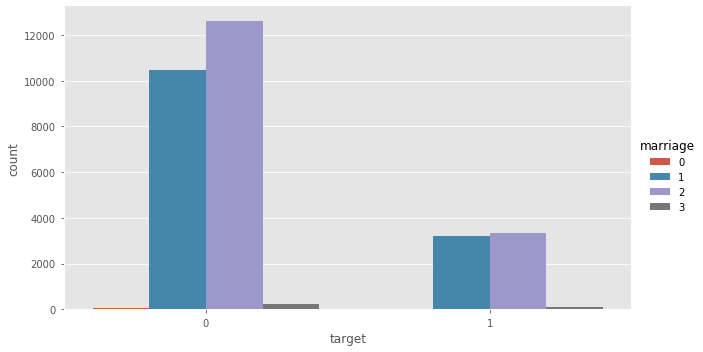

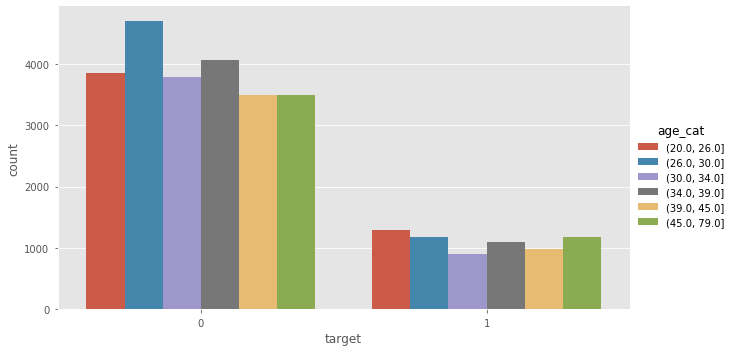

In [142]:

g = sns.factorplot('target', data=df, hue='sex', kind='count', aspect=1.75)
g.set_xlabels('target')

g = sns.factorplot('target', data=df, hue='marriage', kind='count', aspect=1.75)
g.set_xlabels('target')

g = sns.factorplot('target', data=df, hue='age_cat', kind='count', aspect=1.75)
g.set_xlabels('target')

# Correlation

In [143]:
corrMat = df.corr()
print(corrMat)

                            limit_bal       sex  education  marriage  \
limit_bal                    1.000000  0.024755  -0.219161 -0.108139   
sex                          0.024755  1.000000   0.014232 -0.031389   
education                   -0.219161  0.014232   1.000000 -0.143464   
marriage                    -0.108139 -0.031389  -0.143464  1.000000   
age                          0.144713 -0.090874   0.175061 -0.414170   
bill_amt1                    0.285430 -0.033642   0.023581 -0.023472   
bill_amt2                    0.278314 -0.031183   0.018749 -0.021602   
bill_amt3                    0.283236 -0.024563   0.013002 -0.024909   
bill_amt4                    0.293988 -0.021880  -0.000451 -0.023344   
bill_amt5                    0.295562 -0.017005  -0.007567 -0.025393   
bill_amt6                    0.290389 -0.016733  -0.009099 -0.021207   
pay_amt1                     0.195236 -0.000242  -0.037456 -0.005979   
pay_amt2                     0.178408 -0.001391  -0.030038 -0.00

# Covariance

In [144]:
print(df.cov())

                               limit_bal          sex     education  \
limit_bal                   1.683446e+10  1571.050630 -22474.028945   
sex                         1.571051e+03     0.239247      0.005502   
education                  -2.247403e+04     0.005502      0.624651   
marriage                   -7.323670e+03    -0.008014     -0.059184   
age                         1.730767e+05    -0.409726      1.275380   
bill_amt1                   2.727020e+09 -1211.694332   1372.377644   
bill_amt2                   2.570130e+09 -1085.595467   1054.657595   
bill_amt3                   2.548533e+09  -833.207432    712.664124   
bill_amt4                   2.453926e+09  -688.489572    -22.948827   
bill_amt5                   2.331481e+09  -505.694333   -363.577664   
bill_amt6                   2.243837e+09  -487.430160   -428.274232   
pay_amt1                    4.195711e+08    -1.964266   -490.330155   
pay_amt2                    5.333504e+08   -15.675500   -547.005021   
pay_am

# Dimensionality Reduction With PCA

Original number of features: 25
Reduced number of features: 20


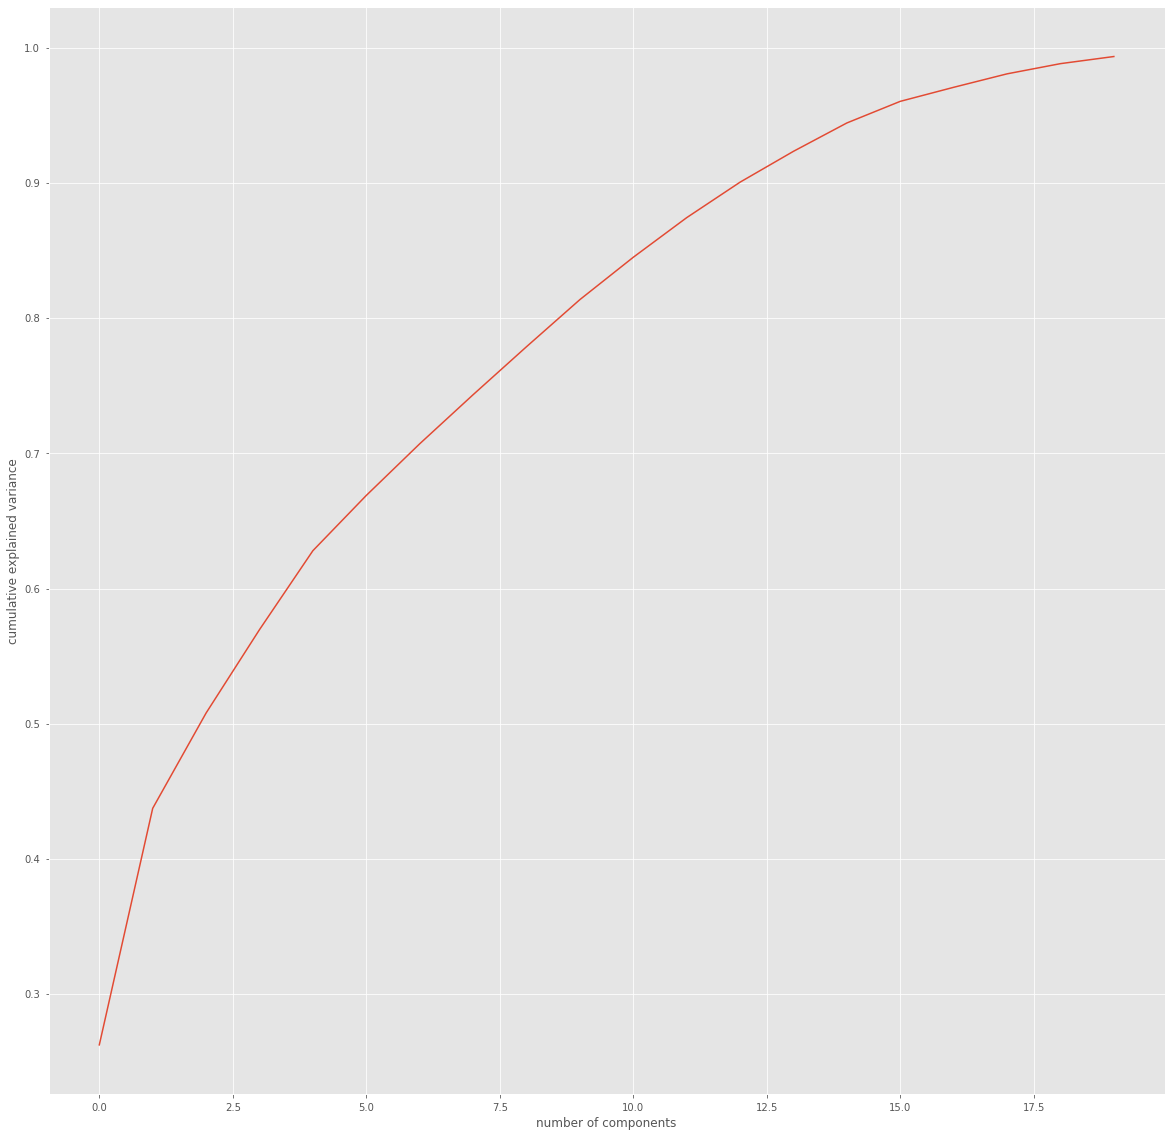

In [145]:
#https://chrisalbon.com/machine_learning/feature_engineering/dimensionality_reduction_with_pca/
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets

X = StandardScaler().fit_transform(df2)
# Create a PCA that will retain 99% of the variance
pca2 = PCA(n_components=0.99)

# Conduct PCA
X_pca2 = pca2.fit_transform(X)

# Show results
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca2.shape[1])

#print(pca2.components_)
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


# RFE

In [146]:
#https://blog.datadive.net/selecting-good-features-part-iv-stability-selection-rfe-and-everything-side-by-side/
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
Y = df2.target.values
X = df2.as_matrix()
names = df2.columns
 
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=20)
rfe.fit(X,Y)
 
print ("Features sorted by their rank:")
print (sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))


Features sorted by their rank:
[(1, 'age'), (1, 'bill_amt2'), (1, 'bill_amt3'), (1, 'bill_amt4'), (1, 'bill_amt5'), (1, 'default payment next month'), (1, 'education'), (1, 'marriage'), (1, 'pay_1'), (1, 'pay_2'), (1, 'pay_3'), (1, 'pay_4'), (1, 'pay_5'), (1, 'pay_6'), (1, 'pay_amt1'), (1, 'pay_amt2'), (1, 'pay_amt5'), (1, 'pay_amt6'), (1, 'sex'), (1, 'target'), (2, 'pay_amt4'), (3, 'pay_amt3'), (4, 'bill_amt6'), (5, 'bill_amt1'), (6, 'limit_bal')]


/Users/csrxr/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [147]:

# Recursive Feature Elimination
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(df2, df2.target)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

/Users/csrxr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/csrxr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/csrxr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/csrxr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/csrxr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

[False  True False False False False False False False False False False
 False False False False False False False False False False False  True
  True]
[19  1  3  2  5  4  7  8  6 10  9 16 17 21 23 18 22 11 12 14 13 15 20  1
  1]


/Users/csrxr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/csrxr/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Feature Importance

In [148]:

# Feature Importance
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data
model = ExtraTreesClassifier()
model.fit(df2, df2.target)
# display the relative importance of each attribute
print(model.feature_importances_)

[2.23251014e-03 0.00000000e+00 0.00000000e+00 1.84126093e-05
 1.69078176e-06 9.25672251e-06 1.06464037e-02 2.07064413e-04
 6.39326177e-04 1.39466511e-05 7.36771643e-03 5.45746196e-06
 0.00000000e+00 1.48712480e-04 0.00000000e+00 0.00000000e+00
 4.11204450e-06 0.00000000e+00 2.44163423e-05 0.00000000e+00
 0.00000000e+00 2.63855562e-06 8.42878269e-06 3.92860925e-01
 5.85808982e-01]


/Users/csrxr/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



## Data Export

In [149]:
df.to_csv("/Users/csrxr/Desktop/Data_Analytics/Course05/t4Modified.csv")